# An introduction to Linear Regression using Python

### Import Packages

In [1]:
# data processing
import numpy as np
import pandas as pd

# modeling
from sklearn import linear_model

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# let's simulate some data for this exercise

def simulate_linreg_data(rows):
    # set-up
    n_samples = rows
    np.random.seed(314)

    def true_fun(X):
        return -np.sin(2.2 * np.pi * X)

    # generate data
    x = np.sort(np.random.rand(n_samples))

    y = true_fun(x) + np.random.randn(n_samples) * 0.1
    
    return pd.DataFrame({'x': x, 'y': y})

df = simulate_linreg_data(20)

df.shape

(20, 2)

In [3]:
df.head()

,x,y
0,0.069914,-0.346400
1,0.122291,-0.636178
2,0.260480,-1.160382
3,0.260757,-1.036982
4,0.261531,-1.048191


Plot the data.

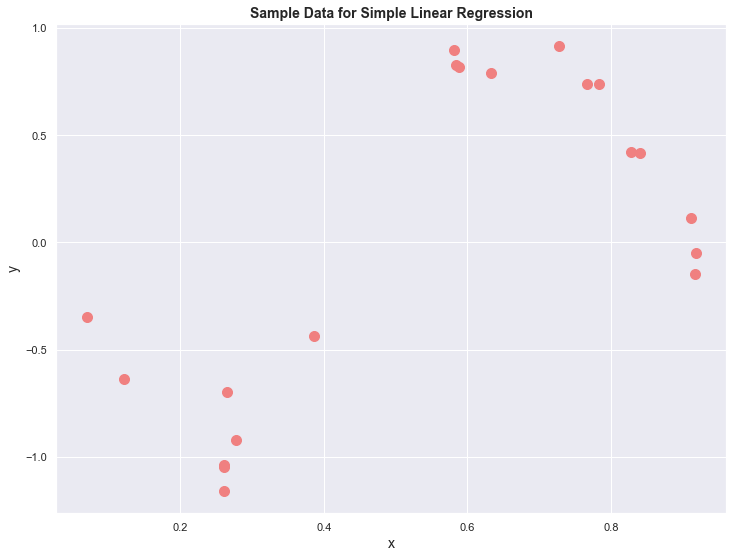

In [4]:
sns.set(style='darkgrid')

plt.figure().set_size_inches(12, 9)

plt.scatter(df.x, df.y, color='lightcoral', s=100)

plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('Sample Data for Simple Linear Regression', fontsize=14, weight='semibold');

### Correlation coefficient

In [5]:
# calculate the correlation coefficient using numpy

np.corrcoef(df.x, df.y)

array([[1.        , 0.67656828],
       [0.67656828, 1.        ]])

In [6]:
# grab the correlatino coefficient from the correlation matrix

corr_coef = np.corrcoef(df.x, df.y)[1][0]

print(corr_coef)

0.6765682759221


Is this the same as the sumproduct of the standarized `x` and `y`?

In [7]:
# standardize x and y using numpy
x_std = (df.x - np.mean(df.x)) / np.std(df.x)
y_std = (df.y - np.mean(df.y)) / np.std(df.y)

print(f'Original means (x, y):\n{df.x.mean():0.2f}, {df.y.mean():0.2f}\n')
print(f'Means after standardizing (x_std, y_std):\n{x_std.mean():.2f}, {y_std.mean():.2f}')

Original means (x, y):
0.55, 0.01

Means after standardizing (x_std, y_std):
-0.00, 0.00


In [8]:
# take the sum product of standardized x and y, and divide by sample size

print (np.dot(x_std, y_std) / df.shape[0])

0.6765682759221


<img src="../misc/corr_coeff.png" align=left width=300>

## Simple Linear Regression

Step 1: Create linear regression object.

In [9]:
linreg = linear_model.LinearRegression()

Step 2: Fit the model.

In [10]:
linreg.fit(df.x[:, np.newaxis], df.y)

LinearRegression()

Intercept and regression coefficients.

In [11]:
print(linreg.intercept_, linreg.coef_[0])

-0.9651642167052664 1.7755723445596452


In [12]:
intercept = linreg.intercept_

coeff = linreg.coef_[0]

Step 3: Make predictions.

In [13]:
# we will make predictions on the same data that we used for training

linreg.predict(df.x[:, np.newaxis])

array([-0.8410274 , -0.74802704, -0.50266238, -0.50217209, -0.50079676,
       -0.49455276, -0.47123664, -0.27978346,  0.06685514,  0.07313017,
        0.07983453,  0.15896776,  0.3273663 ,  0.39559186,  0.4254736 ,
        0.50386446,  0.52646081,  0.65373766,  0.66281116,  0.66481308])

In [14]:
# save those predictions in a new variable

y_hat = linreg.predict(df.x[:, np.newaxis])

Plot the data with the regression line.

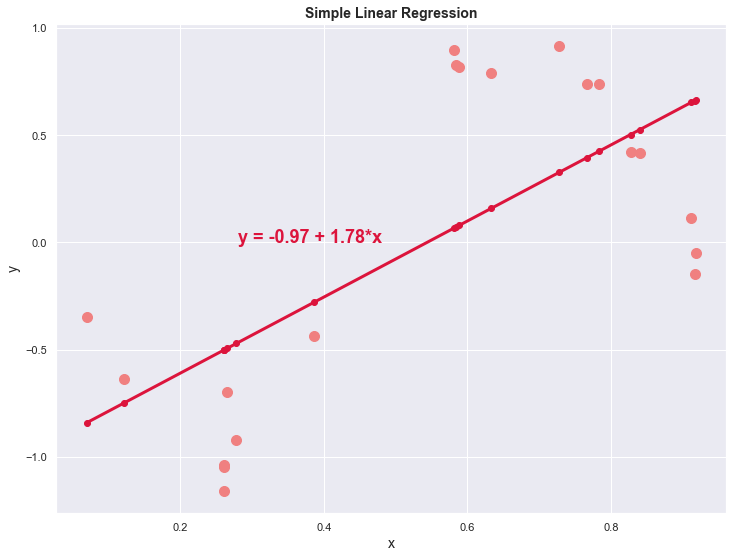

In [15]:
sns.set(style='darkgrid')
plt.figure().set_size_inches(12, 9)

plt.scatter(df.x, df.y, color='lightcoral', s=100)

plt.scatter(df.x, y_hat, color='crimson')
plt.plot(df.x, linreg.predict(df.x[:, np.newaxis]), color='crimson', linewidth=3)

plt.text(.28, 0, f'y = {intercept:.2f} + {coeff:.2f}*x', 
         fontsize=18, color='crimson', weight='semibold')

plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('Simple Linear Regression', fontsize=14, weight='semibold')
plt.show()

### Regression Slope and Intercept

We can manually calculate the regression slope and intercept using the correlation coefficient, the averages and standard deviations for `x` and `y`.

In [16]:
reg_slope = corr_coef * np.std(df.y) / np.std(df.x)

print(reg_slope)

1.7755723445596445


In [17]:
reg_intercept = df.y.mean() - reg_slope * df.x.mean()

print(reg_intercept)

-0.9651642167052661


<img src='../misc/reg_slope_and_intercept.png' align=left width=700>

## Multiple Linear Regression

#### Read the wine quality data and perform linear regression using all numeric features to predict the wine quality.

Step 1: Read data into a dataframe.

In [18]:
df_wine = pd.read_csv(r'../data/winequality.csv', index_col=0)

df_wine.shape

(6497, 13)

Step 2: Check column types.

In [19]:
df_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine type                object
dtype: object

Step 3: Isolate numeric columns. We will use all variables of type float as predictors in our model.

In [20]:
x_vars = df_wine.columns[df_wine.dtypes == 'float64']

print(f'Predictors: \n {x_vars}')

Predictors: 
 Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


Step 4: Create linear regression object.

In [21]:
linreg = linear_model.LinearRegression()

Step 5: Fit a regression model using these predictors. Use `quality` as the target variable.

In [22]:
X = df_wine[x_vars]
y = df_wine.quality

linreg.fit(X, y)

LinearRegression()

Step 6: View (print) intercept and coefficient values.

In [23]:
linreg.intercept_, linreg.coef_

(55.76274961173735,
 array([ 6.76839156e-02, -1.32789221e+00, -1.09656648e-01,  4.35587507e-02,
        -4.83713531e-01,  5.96988830e-03, -2.48129841e-03, -5.49669422e+01,
         4.39296072e-01,  7.68251760e-01,  2.67030009e-01]))

Combine coefficients with the column names.

In [24]:
list(zip(x_vars, linreg.coef_))

[('fixed acidity', 0.06768391557153516),
 ('volatile acidity', -1.3278922111895095),
 ('citric acid', -0.10965664815793238),
 ('residual sugar', 0.04355875074070315),
 ('chlorides', -0.48371353068604117),
 ('free sulfur dioxide', 0.005969888299277128),
 ('total sulfur dioxide', -0.0024812984083657993),
 ('density', -54.96694221961977),
 ('pH', 0.43929607193865716),
 ('sulphates', 0.7682517601447575),
 ('alcohol', 0.2670300088387691)]

Create a dataframe and store the results (parameters and coefficients) into it.

In [25]:
df_coeff = pd.DataFrame(columns=['feature', 'coeff'])

df_coeff['feature'] = x_vars
df_coeff['coeff'] = linreg.coef_

df_coeff

,feature,coeff
0,fixed acidity,0.067684
1,volatile acidity,-1.327892
2,citric acid,-0.109657
3,residual sugar,0.043559
4,chlorides,-0.483714
5,free sulfur dioxide,0.005970
6,total sulfur dioxide,-0.002481
7,density,-54.966942
8,pH,0.439296
9,sulphates,0.768252


_Note: All of these features have different means and variances. In order to compare the coefficients across features, we must either standardize the data first or calculate standardized coefficients._

Step 7: Make predictions and store them in the same dataframe (as a new column).

In [26]:
df_wine['preds'] = linreg.predict(X)

df_wine[['quality', 'preds']].head(10)

,quality,preds
0,6,5.556809
1,6,5.281311
2,6,5.879632
3,6,5.697990
4,6,5.697990
5,6,5.879632
6,6,5.499621
7,6,5.556809
8,6,5.281311
9,6,5.934254


Step 8: Plot the actuals (wine quality) versus residuals.

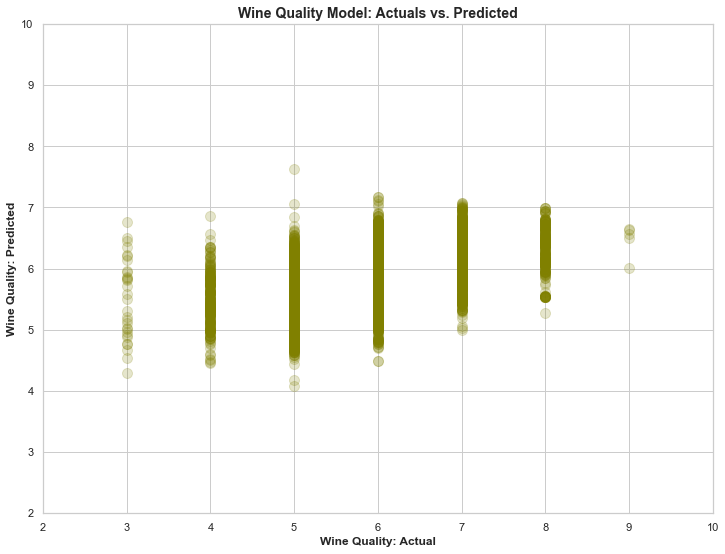

In [27]:
sns.set(style='whitegrid')
plt.figure().set_size_inches(12, 9)

plt.scatter(df_wine.quality, df_wine.preds, color='olive', s=100, alpha=0.2)

plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)

plt.xlim([2, 10])
plt.ylim([2, 10])

plt.xlabel('Wine Quality: Actual', fontsize=12, weight='semibold')
plt.ylabel('Wine Quality: Predicted', fontsize=12, weight='semibold')
plt.title('Wine Quality Model: Actuals vs. Predicted', fontsize=14, weight='semibold')
plt.show();

Coefficient of determination: R squared

In [28]:
from sklearn.metrics import r2_score

r2 = r2_score(df_wine.quality, df_wine.preds)

r2

0.29213688504020474

Adjusted R squared

In [29]:
n, p = df_wine.shape[0], df_wine.shape[1]

adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

adj_r2

0.2906080230208531

Mean Squared Error (MSE)

In [30]:
from sklearn.metrics import mean_squared_error

mean_squared_error(df_wine.quality, df_wine.preds)

0.5397154672783371

## Forward selection

In [31]:
corr = []
for x in x_vars:
    corr.append(df_wine[x].corr(df_wine['quality']))

sorted_vars = [x for _, x in sorted(zip(corr, x_vars), reverse=True)]

sorted_vars

['alcohol',
 'citric acid',
 'free sulfur dioxide',
 'sulphates',
 'pH',
 'residual sugar',
 'total sulfur dioxide',
 'fixed acidity',
 'chlorides',
 'volatile acidity',
 'density']

In [34]:
for i in range(len(sorted_vars)):
    _x_vars = sorted_vars[:i+1]
    X = df_wine[_x_vars]
    print(f'Model with {i+1} predictors')
    
    _preds = linreg.fit(X, y).predict(X)
    
    _adj_r2 = 1 - (1 - r2_score(df_wine.quality, _preds)) * (n - 1) / (n - p - 1)
    
    print(f'\tMSE: {mean_squared_error(y, _preds):.3f}, Adj. R-squared: {_adj_r2:.3f}')

Model with 1 predictors
	MSE: 0.612, Adj. R-squared: 0.196
Model with 2 predictors
	MSE: 0.606, Adj. R-squared: 0.204
Model with 3 predictors
	MSE: 0.593, Adj. R-squared: 0.220
Model with 4 predictors
	MSE: 0.591, Adj. R-squared: 0.224
Model with 5 predictors
	MSE: 0.591, Adj. R-squared: 0.224
Model with 6 predictors
	MSE: 0.584, Adj. R-squared: 0.232
Model with 7 predictors
	MSE: 0.583, Adj. R-squared: 0.234
Model with 8 predictors
	MSE: 0.581, Adj. R-squared: 0.236
Model with 9 predictors
	MSE: 0.575, Adj. R-squared: 0.244
Model with 10 predictors
	MSE: 0.541, Adj. R-squared: 0.288
Model with 11 predictors
	MSE: 0.540, Adj. R-squared: 0.291


For this dataset, it looks like including all available variables as predictors makes sense because both MSE and Adj. R-squared values continue to increase as we add more predictors in the model. However, if you had more variables, you might see that there are diminishing returns in model accuracy metrics after a certain point. This would help determining when to stop adding more predictors in the model (aka feature selection).